In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

Showing data and limiting the countries to only UK

In [2]:
data_con = pd.read_csv('confirmed_pivot.csv')
data_dead = pd.read_csv('deaths_pivot.csv')

Data from UK only

In [3]:
not_uk = data_con['country'].unique() # getting all the unique country names
for i in range(len(not_uk)):
    if not_uk[i] == 'United Kingdom':
        not_uk = np.delete(not_uk, [i])
        break

for i in range(len(not_uk)):
    data_con = data_con[data_con.country != not_uk[i]]
    data_dead = data_dead[data_dead.country != not_uk[i]]

data_con = data_con.reset_index(drop=True)
data_dead = data_dead.reset_index(drop=True) 

In [4]:
data_con.head()

,country,date,total
0,United Kingdom,01/01/2021,2549693
1,United Kingdom,10/01/2021,3081372
2,United Kingdom,11/01/2021,3127647
3,United Kingdom,12/01/2021,3173295
4,United Kingdom,13/01/2021,3220957


In [5]:
data_dead.head()

,country,date,total
0,United Kingdom,2021-01-01,74237
1,United Kingdom,2021-01-10,81567
2,United Kingdom,2021-01-11,82096
3,United Kingdom,2021-01-12,83342
4,United Kingdom,2021-01-13,84910


sorting dataframe by date

In [6]:
data_con['year'] = ""
data_con['month'] = ""
data_con['day'] = ""
data_con['year-month'] = ""
data_con['year-month-day'] = ""

data_dead['year'] = ""
data_dead['month'] = ""
data_dead['day'] = ""
data_dead['year-month'] = ""
data_dead['year-month-day'] = ""

In [7]:
for i in range(len(data_con)):
    day,month,year = data_con['date'][i].split('/')
    data_con['year'][i] = year
    data_con['month'][i] = month
    data_con['day'][i] = day
    data_con['year-month'][i] = year+'/'+month
    data_con['year-month-day'][i] = year+'/'+month+'/'+day

for i in range(len(data_dead)):
    year,month,day = data_dead['date'][i].split('-')
    data_dead['year'][i] = year
    data_dead['month'][i] = month
    data_dead['day'][i] = day
    data_dead['year-month'][i] = year+'/'+month
    data_dead['year-month-day'][i] = year+'/'+month+'/'+day

<ipython-input-7-5e1c269b7bb0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_con['year'][i] = year
<ipython-input-7-5e1c269b7bb0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_con['month'][i] = month
<ipython-input-7-5e1c269b7bb0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_con['day'][i] = day
<ipython-input-7-5e1c269b7bb0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [8]:
data_con.head()

,country,date,total,year,month,day,year-month,year-month-day
0,United Kingdom,01/01/2021,2549693,2021,01,01,2021/01,2021/01/01
1,United Kingdom,10/01/2021,3081372,2021,01,10,2021/01,2021/01/10
2,United Kingdom,11/01/2021,3127647,2021,01,11,2021/01,2021/01/11
3,United Kingdom,12/01/2021,3173295,2021,01,12,2021/01,2021/01/12
4,United Kingdom,13/01/2021,3220957,2021,01,13,2021/01,2021/01/13


In [9]:
data_dead.head()

,country,date,total,year,month,day,year-month,year-month-day
0,United Kingdom,2021-01-01,74237,2021,01,01,2021/01,2021/01/01
1,United Kingdom,2021-01-10,81567,2021,01,10,2021/01,2021/01/10
2,United Kingdom,2021-01-11,82096,2021,01,11,2021/01,2021/01/11
3,United Kingdom,2021-01-12,83342,2021,01,12,2021/01,2021/01/12
4,United Kingdom,2021-01-13,84910,2021,01,13,2021/01,2021/01/13


In [10]:
data_con = data_con.sort_values(by='year-month-day')
data_con = data_con.reset_index(drop=True)

data_dead = data_dead.sort_values(by='year-month-day')
data_dead = data_dead.reset_index(drop=True)

In [11]:
data_con.head()

,country,date,total,year,month,day,year-month,year-month-day
0,United Kingdom,22/01/2020,0,2020,01,22,2020/01,2020/01/22
1,United Kingdom,23/01/2020,0,2020,01,23,2020/01,2020/01/23
2,United Kingdom,24/01/2020,0,2020,01,24,2020/01,2020/01/24
3,United Kingdom,25/01/2020,0,2020,01,25,2020/01,2020/01/25
4,United Kingdom,26/01/2020,0,2020,01,26,2020/01,2020/01/26


In [12]:
data_dead = data_dead.loc[0:(len(data_con)-1)]
data_dead.head()

,country,date,total,year,month,day,year-month,year-month-day
0,United Kingdom,2020-01-22,0,2020,01,22,2020/01,2020/01/22
1,United Kingdom,2020-01-23,0,2020,01,23,2020/01,2020/01/23
2,United Kingdom,2020-01-24,0,2020,01,24,2020/01,2020/01/24
3,United Kingdom,2020-01-25,0,2020,01,25,2020/01,2020/01/25
4,United Kingdom,2020-01-26,0,2020,01,26,2020/01,2020/01/26


In [13]:
#monthly_con = data_con.groupby('year-month')['total'].max().reset_index()
#monthly_dead = data_dead.groupby('year-month')['total'].max().reset_index()

In [14]:
monthly_con = data_con.copy()
monthly_dead = data_dead.copy()

monthly_con = monthly_con.drop(['country','date','year','month','day','year-month'],axis=1)
monthly_dead = monthly_dead.drop(['country','date','year','month','day','year-month'],axis=1)

In [15]:
monthly_con

,total,year-month-day
0,0,2020/01/22
1,0,2020/01/23
2,0,2020/01/24
3,0,2020/01/25
4,0,2020/01/26
...,...,...
410,4231166,2021/03/07
411,4235989,2021/03/08
412,4241858,2021/03/09
413,4247879,2021/03/10


In [16]:
monthly_dead

,total,year-month-day
0,0,2020/01/22
1,0,2020/01/23
2,0,2020/01/24
3,0,2020/01/25
4,0,2020/01/26
...,...,...
410,124736,2021/03/07
411,124801,2021/03/08
412,125032,2021/03/09
413,125222,2021/03/10


In [17]:
monthly_con['year-month-day'] = pd.to_datetime(monthly_con['year-month-day'])
monthly_dead['year-month-day'] = pd.to_datetime(monthly_dead['year-month-day'])

monthly_con = monthly_con.set_index('year-month-day')
monthly_dead = monthly_dead.set_index('year-month-day')

In [18]:
monthly_con_case = monthly_con['total'].resample('MS').max()

In [19]:
# Removing row of 2021/03 (incomplete data)
monthly_con_case

year-month-day
2020-01-01          2
2020-02-01         61
2020-03-01      38815
2020-04-01     178771
2020-05-01     257539
2020-06-01     285216
2020-07-01     304793
2020-08-01     338083
2020-09-01     455848
2020-10-01    1014795
2020-11-01    1633736
2020-12-01    2496235
2021-01-01    3828187
2021-02-01    4188827
2021-03-01    4254714
Freq: MS, Name: total, dtype: int64

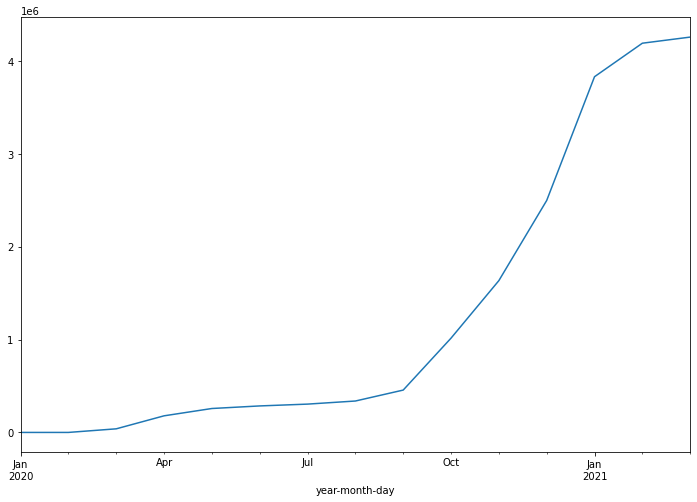

In [20]:
monthly_con_case.plot(figsize=(12,8))

In [21]:
# Not used
monthly_case = monthly_con.copy()

for i in range(len(monthly_case)):
    monthly_case['total'][i] = monthly_con['total'][i] - monthly_dead['total'][i]

monthly_case

,total
year-month-day,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2021-03-07,4106430
2021-03-08,4111188
2021-03-09,4116826


# Time-Series Forecasting

In [22]:
import statsmodels.api as sm
import itertools
import warnings


p=d=q = range(0,2)
pdq = list(itertools.product(p,d,q))
monthly_pdq = [(x[0],x[1],x[2],30) for x in list(itertools.product(p,d,q))]

from statsmodels.tsa.stattools import adfuller

for param in pdq:
    for param_monthly in monthly_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_con_case, order=param, seasonal_order=param_monthly, enforce_stationarity=False, enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_monthly, results.aic))
        except:
            continue

In [23]:
mod = sm.tsa.statespace.SARIMAX(monthly_con_case,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

E:\Coding\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
E:\Coding\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
E:\Coding\Anaconda\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3051: UserWarning: Later subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  warnings.warn('Later subset of data for variable %d'
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       

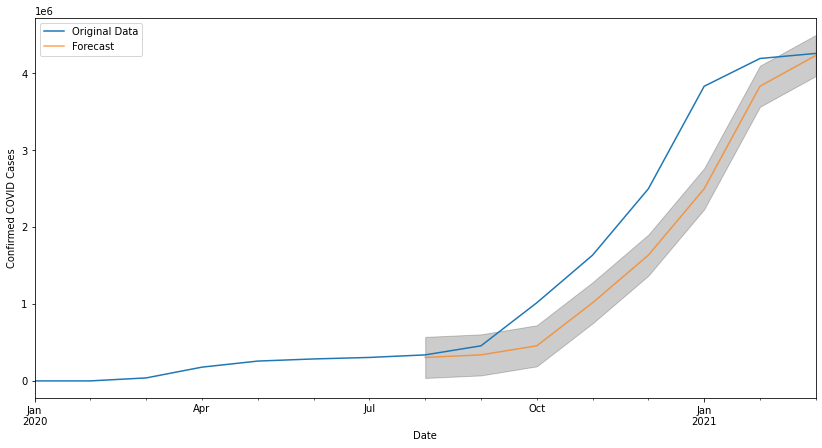

In [24]:
pred = results.get_prediction(start=pd.to_datetime('2020-08-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = monthly_con_case['2020':].plot(label='Original Data')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed COVID Cases')
plt.legend()
plt.show()

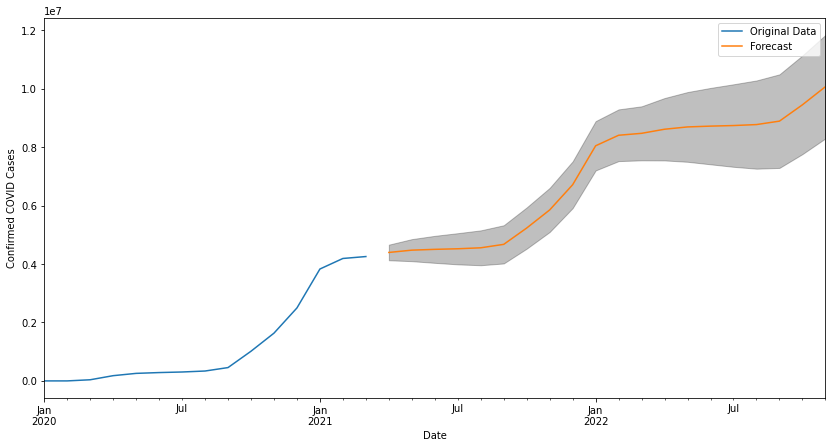

In [25]:
pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = monthly_con_case.plot(label='Original Data', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed COVID Cases')
plt.legend()
plt.show()